# Exploratory Data Analysis

* **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv(r"C:\Users\aahil\OneDrive\Desktop\Flipkart\Processed_Flipkart_Data.csv")
df.head()

,Brand,Color_Group,Stars,Num_Ratings,Num_Reviews,RAM,Storage,Expandable,Processor_Brand,Display,Total_Cameras,Battery_Capacity,Price
0,SAMSUNG,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,6.60,4,6000.0,9699
1,POCO,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,6.52,2,5000.0,5749
2,POCO,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,6.52,2,5000.0,5749
3,REDMI,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,6.70,3,6000.0,9299
4,REDMI,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,6.70,3,6000.0,9299


In [49]:
# Checking the Datatypes of the columns
df.dtypes

Brand                object
Color_Group          object
Stars               float64
Num_Ratings           int64
Num_Reviews           int64
RAM                  object
Storage              object
Expandable           object
Processor_Brand      object
Display             float64
Total_Cameras         int64
Battery_Capacity    float64
Price                 int64
dtype: object

In [50]:
# Statistical description of the Dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Stars,661.0,4.292436,0.196493,3.00,4.2,4.30,4.4,4.70
Num_Ratings,661.0,40642.299546,74138.061990,9.00,1141.0,6165.00,45027.0,577732.00
Num_Reviews,661.0,2838.470499,4989.908085,1.00,84.0,544.00,3602.0,33897.00
Display,661.0,6.538950,0.191028,5.45,6.5,6.56,6.6,6.95
Total_Cameras,661.0,3.016641,1.235103,1.00,2.0,3.00,4.0,6.00
Battery_Capacity,661.0,4993.208775,471.153953,3000.00,5000.0,5000.00,5000.0,7000.00
Price,661.0,20453.042360,19469.899443,4699.00,9990.0,13999.00,19999.0,127999.00


In [51]:
# 'isnull().sum()' returns the number of missing values in each variable

Total = df.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])  

In [52]:
missing_data['Type'] = df[missing_data.index].dtypes

In [53]:
missing_data

,Total,Percentage of Missing Values,Type
Brand,0,0.0,object
Color_Group,0,0.0,object
Stars,0,0.0,float64
Num_Ratings,0,0.0,int64
Num_Reviews,0,0.0,int64
RAM,0,0.0,object
Storage,0,0.0,object
Expandable,0,0.0,object
Processor_Brand,0,0.0,object
Display,0,0.0,float64


In [54]:
df.Brand.unique()

array(['SAMSUNG', 'POCO', 'REDMI', 'Infinix', 'APPLE', 'MOTOROLA', 'vivo',
       'Google', 'realme', 'Realme', 'OPPO', 'OnePlus', 'Nothing',
       'Micromax', 'Tecno', 'IQOO', 'Redmi', 'itel', 'Motorola', 'oppo',
       'LAVA', 'Nokia', 'ASUS', 'Xiaomi', 'Mi'], dtype=object)

In [55]:
# Replacing the repeated typo errors
df.Brand.replace({"realme":"Realme","Redmi":"REDMI","Motorola":"MOTOROLA","oppo":"OPPO"
                 , "Infinix":"INFINIX","vivo":"VIVO","Google":"GOOGLE","Itel":"ITEL"
                 ,"Tecno":"TECNO","Nokia":"NOKIA"},inplace=True)

In [56]:
df.Brand.unique()

array(['SAMSUNG', 'POCO', 'REDMI', 'INFINIX', 'APPLE', 'MOTOROLA', 'VIVO',
       'GOOGLE', 'Realme', 'OPPO', 'OnePlus', 'Nothing', 'Micromax',
       'TECNO', 'IQOO', 'itel', 'LAVA', 'NOKIA', 'ASUS', 'Xiaomi', 'Mi'],
      dtype=object)

In [57]:
import plotly.express as px
import pandas as pd

# Assuming mobile_df is your DataFrame

company_counts = df['Brand'].value_counts().reset_index()
company_counts.columns = ['Brand', 'Count']

fig = px.bar(company_counts, x='Brand', y='Count', color='Brand',
             title='Brand with Most Number of Sales')

fig.show()

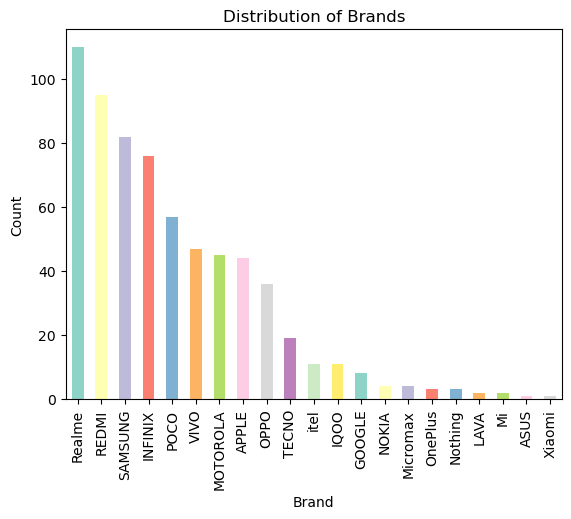

In [58]:
# Define a color palette
colors = sns.color_palette("Set3")

# Plot the bar chart with the specified color palette
df.Brand.value_counts().plot(kind="bar", color=colors)

# Add labels and title
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Distribution of Brands")

# Display the plot
plt.show()

* **From this barplot we see that there are 21 brands with Realme having the most number of smartphone models followed by Redmi and Samsung.
Moreover, Xiaomi having least number of Smartphone phones sales**

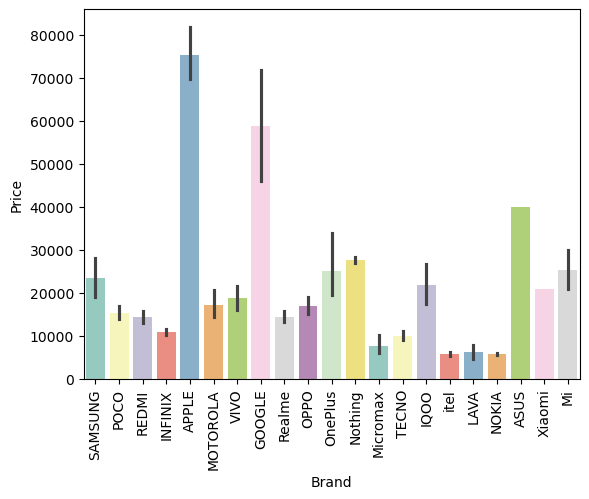

In [59]:
# Since 'Price' is the target variable lets take a look at the distribution of Price for each of the companies

sns.barplot(x="Brand",y="Price",data=df, palette = 'Set3')
plt.xticks(rotation='vertical')
plt.show()

* **From this barplot we come to know that Apple company's martphones are the most expensive ones with prices in the range between 70k - 80k, followed by Google smartphones. 
Companies like Samsung, Asus, Poco, Redmi, Infinix, Motoerola, etc brings smartphones in the range of 20,000 Rs. - 40,000 Rs.**

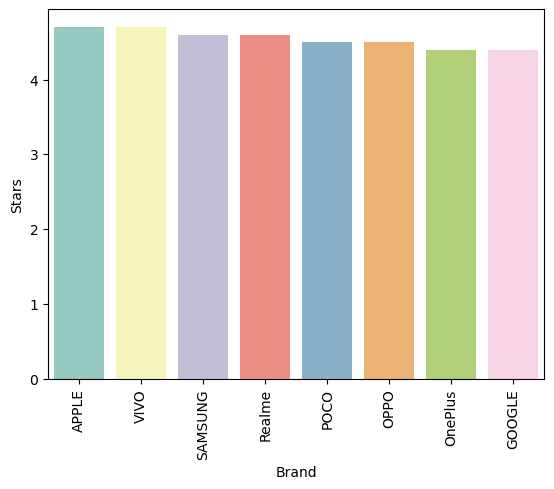

In [70]:
import plotly.graph_objs as go
from plotly.graph_objs import Figure

company_ratings = df.groupby("Brand")["Stars"].max()

# Sort the ratings in descending order
company_ratings = company_ratings.sort_values(ascending=False)[:8]

# Convert the Series back to a DataFrame and reset the index
company_ratings_df = company_ratings.reset_index()

sns.barplot(x="Brand",y="Stars",data=company_ratings_df, palette = 'Set3')
plt.xticks(rotation='vertical')
plt.show()

* **From this Graph we come to know that the Highest rating of all the companies is given to 'APPLE', followed by VIVO and Samsung respectively**

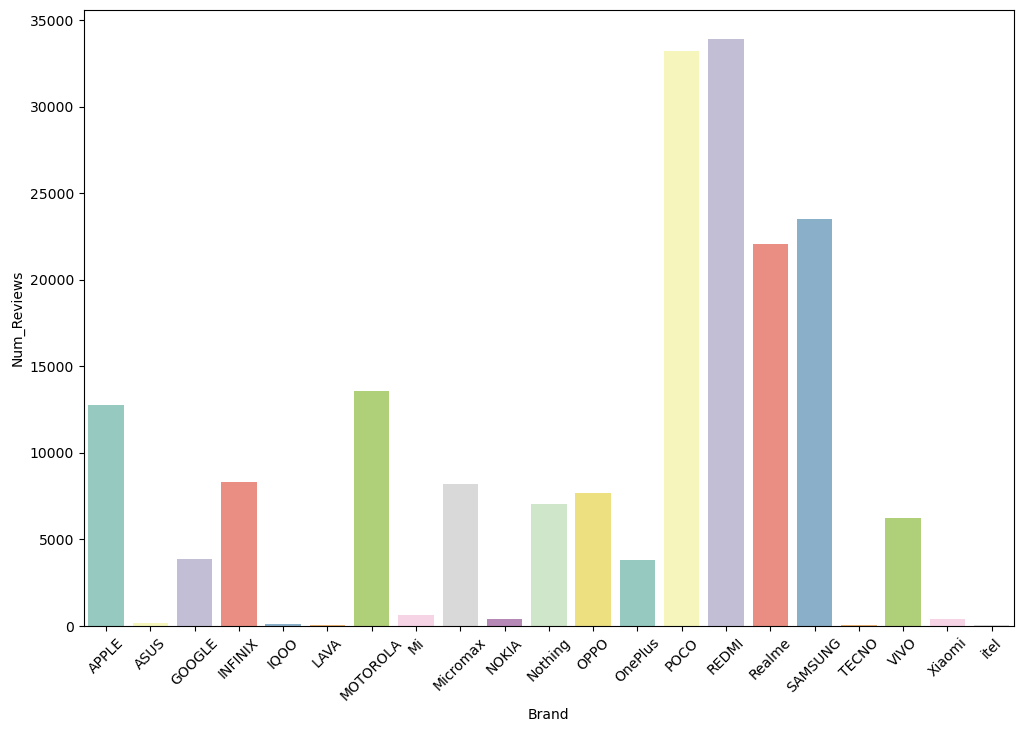

In [90]:
# Group by company and find the highest reviewed models
grouped_df = df.groupby("Brand")
highest_reviewed_models = grouped_df.apply(lambda x: x.sort_values("Num_Reviews", ascending=False).iloc[0])
highest_reviewed_df = pd.DataFrame(highest_reviewed_models)

# Define a color palette
colors = sns.color_palette("Set3")

# Create the bar plot using seaborn
plt.subplots(figsize=(12, 8))
sns.barplot(x="Brand", y="Num_Reviews", data=highest_reviewed_df, palette=colors)
plt.xticks(rotation=45)
plt.show()

* **The most Reviewed Models are of the companies like REDMI, POCO, REALME, SAMSUNG which indicate they are the most popular and sought after brands in the market.**

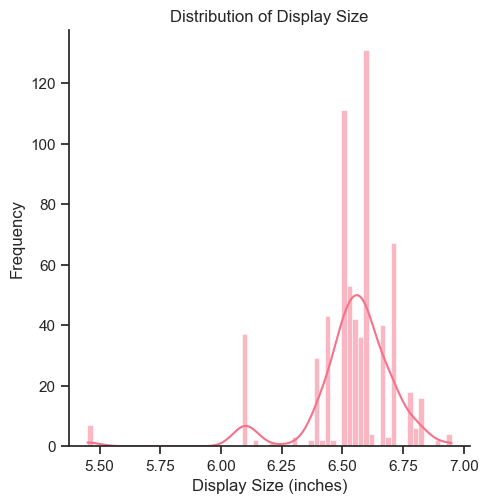

In [99]:
colors = sns.color_palette("husl")

# Create the distribution plot using seaborn
sns.set(style="ticks")
sns.displot(df['Display'], kde=True, color=colors[0])

# Customize the plot
plt.xlabel("Display Size (inches)")
plt.ylabel("Frequency")
plt.title("Distribution of Display Size")
plt.show()

* **From this we can say that smartphones with a screen size of 6.5 inches to 6.75 inches are more common as compared to the others.**

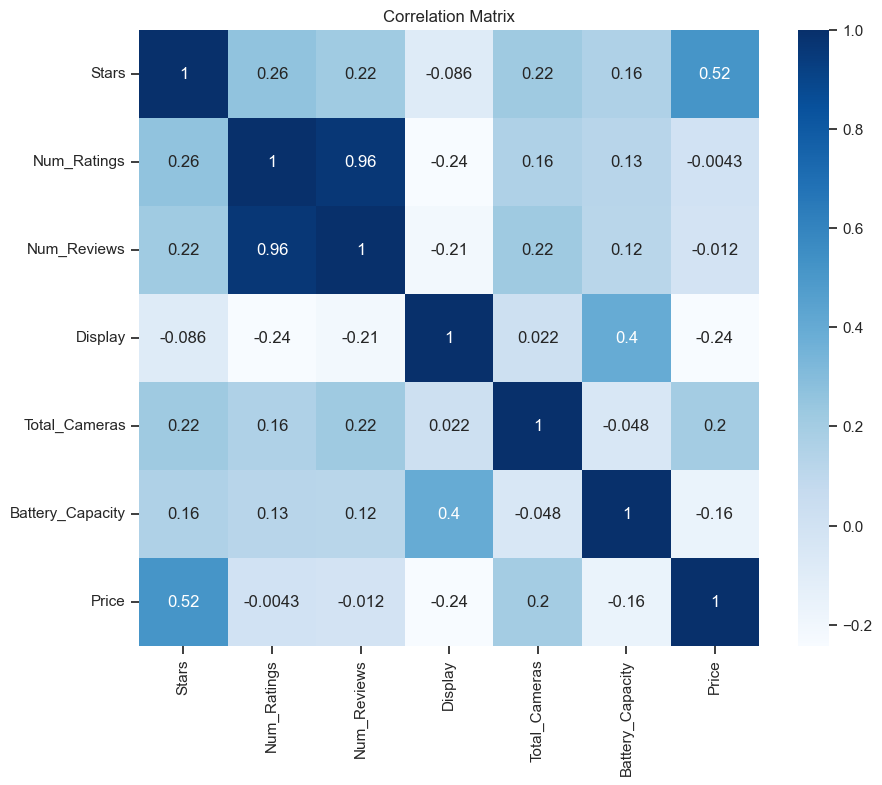

In [107]:
# Corelation matrix

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

* **Inferences derived from the Heatmap**

    * **There is a strong positive correlation between the number of ratings and the number of reviews, which makes sense since more popular phones are likely to have more reviews.**

    * **There is a weak positive correlation between the display size and battery capacity, which suggests that larger screens may require more battery power.**
    * **There is no strong correlation between any other pairs of variables, suggesting that they are largely independent of each other.**

* **Pairplot of the Dataset**



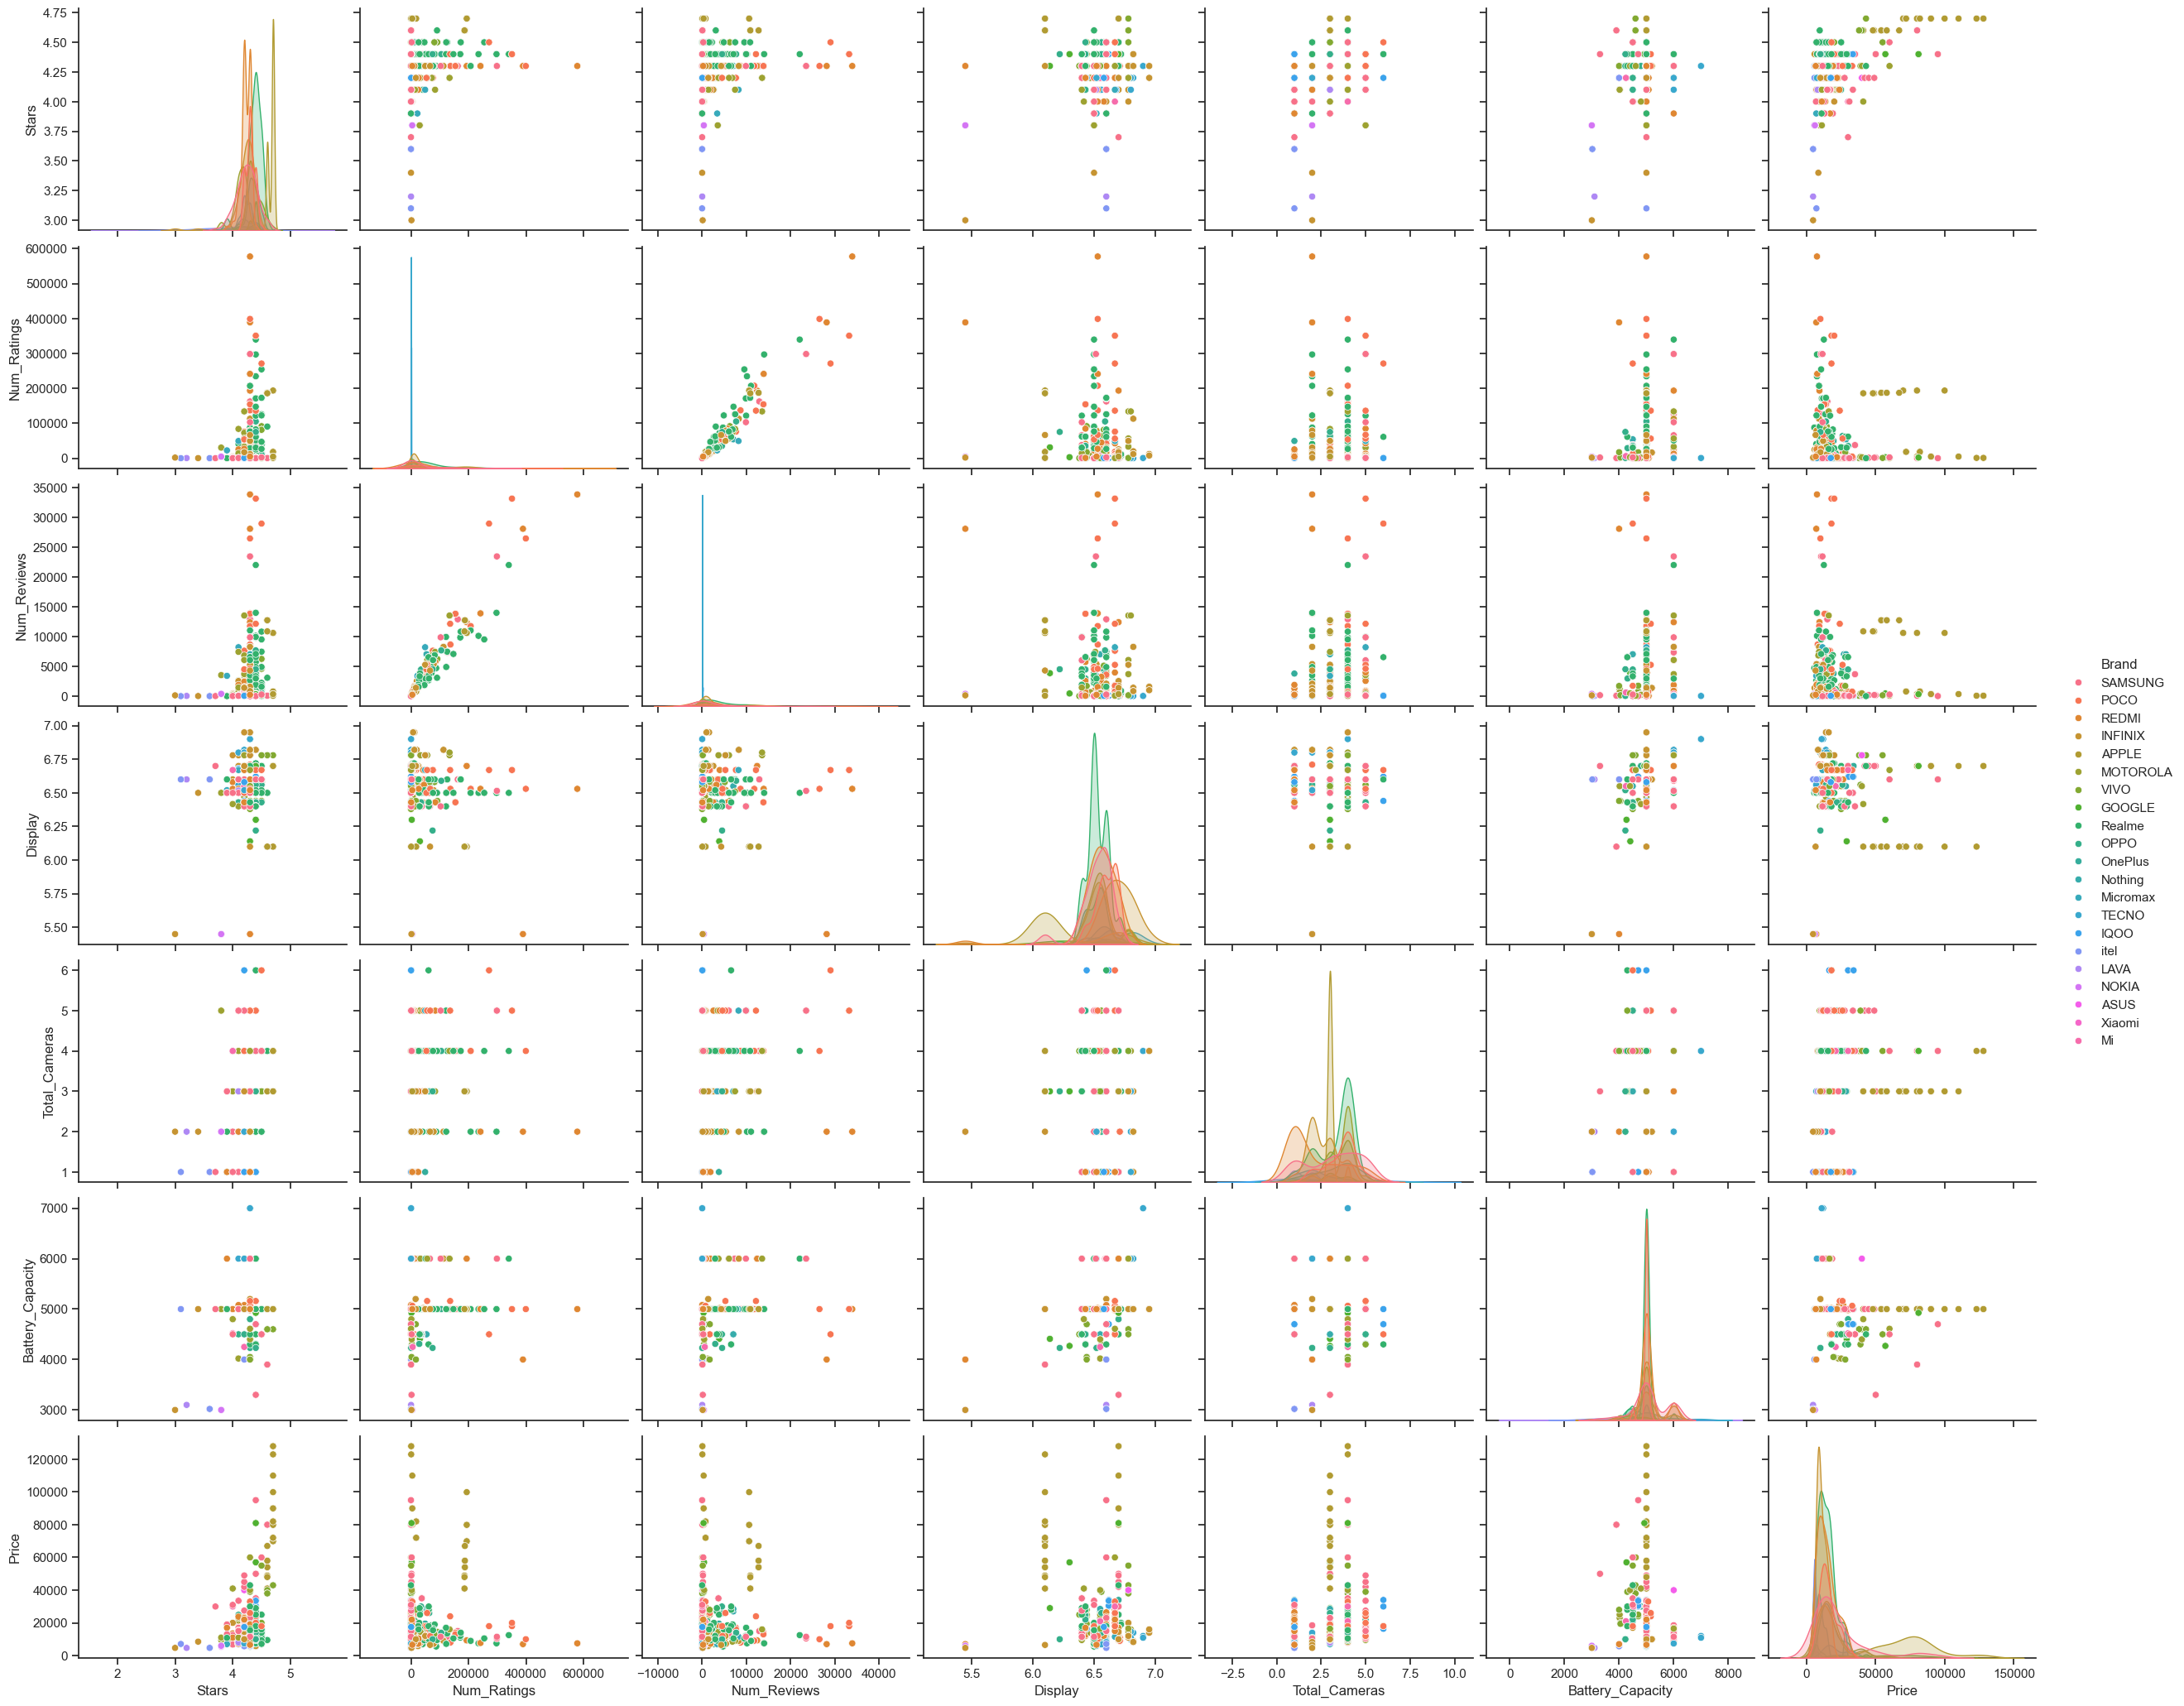

In [109]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Brand", diag_kind="kde", height=3, aspect=1.2)

* **Inferences derived from the pairplot**

    * **There appears to be a strong positive correlation between the number of ratings and the number of reviews, as indicated by the dense cluster of points in the top-right corner of the scatterplot matrix.**
    
    * **Most phones have a display size between 6 and 7 inches, as shown by the peak in the kernel density estimate in the diagonal plot for display size.**
    * **There are some differences between the companies in terms of the distribution of their phone features, particularly in terms of battery capacity, display size, and price.**